In [1]:
import pickle as pkl
import pandas as pd

In [2]:
file_path = "results/cifar/scores_03201828.pkl"
with open(file_path, "rb") as file:
    results = pkl.load(file=file)
    desc = results[0]
    scores_list = results[1:]
print(desc)

200, 50 SoftPointWiseKNN. bn + var lr (1e-3). s/(1-s) scaling. Changed cifar transform


for changing desc if needed

In [3]:
# change_desc = False
# if change_desc:
#     new_desc = f'mask with var lr, bn, and tuned knn.'
#     results[0] = new_desc
#     with open(file_path, "wb") as file:
#         pkl.dump(obj=results, file=file)

In [4]:
for i, scores in enumerate(scores_list):
    print(abs(scores['nona euclidean mlp'][0]))

print(i+1, 'splits')

0.6469999551773071
0.6491999626159668
0.6370999813079834
0.6492999792098999
0.6401999592781067
0.6401000022888184
0.6376999616622925
0.6437000036239624
0.6424999833106995
0.6485999822616577
10 splits


In [5]:
scores = {method.split(" mlp")[0]: [abs(scores[method][0]) for scores in scores_list] for method in scores_list[0]}# if 'dense' not in method}

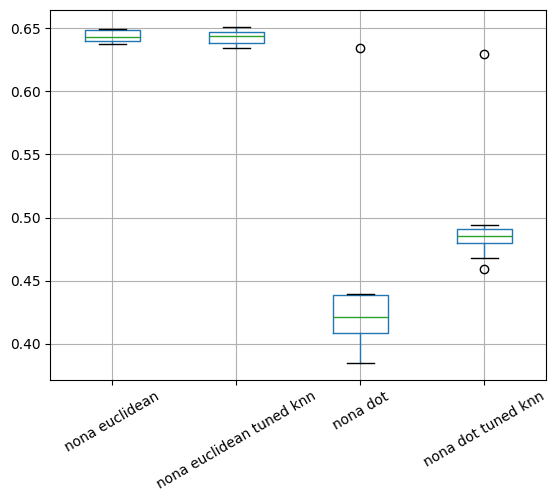

In [6]:
bplot = pd.DataFrame(scores).boxplot(rot=30)
# bplot.set_title('mse on adresso mmse')

In [7]:
pd.DataFrame(scores).median()

nona euclidean              0.64310
nona euclidean tuned knn    0.64370
nona dot                    0.42170
nona dot tuned knn          0.48555
dtype: float64

In [8]:
times = {method: [scores[method][1] for scores in scores_list] for method in scores_list[0]}

In [9]:
pd.DataFrame(times).median() / 3600

nona euclidean mlp          0.112522
nona euclidean tuned knn    0.003414
nona dot mlp                0.033925
nona dot tuned knn          0.003616
dtype: float64